In [3]:
import os
import matplotlib.pyplot as plt
import jax.numpy as np
import pdb
from pdb import set_trace
import numpy
from util import load_matrix_response
from analysis import full_width_half_max, plot_pre_post_scatter, avg_slope

In [4]:
#Name of results csv
home_dir = os.getcwd()
ori_list = np.linspace(-35, 145, 61).astype(int)
d_theta = ori_list[1]-ori_list[0]

#Specify folder to save results
results_dir = os.path.join(os.getcwd(), 'results', '11-12', 'noise200.0gE0.3_5', 'response_matrices')

#Saving directory for plots
save_dir = os.path.join(results_dir,  'plots')

#Load response matrices
epoch = 1
mid_layer_pre = np.load(os.path.join(results_dir, 'response_epoch'+str(epoch)+'_mid.npy')).squeeze()
sup_layer_pre = np.load(os.path.join(results_dir, 'response_epoch'+str(epoch)+'_sup.npy')).squeeze()
epoch = 685
mid_layer_post = np.load(os.path.join(results_dir, 'response_epoch'+str(epoch)+'_mid.npy')).squeeze()
sup_layer_post = np.load(os.path.join(results_dir, 'response_epoch'+str(epoch)+'_sup.npy')).squeeze()

#Plotting indices
centre_E_indices = np.linspace(0, 80, 81).reshape(9,9)[2:7, 2:7].ravel().astype(int)
centre_I_indices = (centre_E_indices+81).astype(int)
E_indices_mid = np.linspace(0, 647, 648).round().reshape(8, 81, -1)[0:9:2].ravel().astype(int)
I_indices_mid =np.linspace(0, 647, 648).round().reshape(8, 81, -1)[1:9:2].ravel().astype(int)
E_indices_sup = np.linspace(0, 80, 81).astype(int)
I_indices_sup = np.linspace(81, 161, 81).astype(int)


0. Find preferred orientation of each neuron pre training

In [5]:
#Find preferred orientation to bin neurons
pref_mid_pre = ori_list[np.argmax(mid_layer_pre, axis = 1)]
pref_sup_pre = ori_list[np.argmax(sup_layer_pre, axis = 1)]

#Normalise preferred orientations
norm_oris_mid = pref_mid_pre -55
norm_oris_sup = pref_sup_pre - 55

1. Baseline

In [6]:
#Calculate baseline value
baseline_mid_pre =mid_layer_pre.min(axis = 1)
baseline_mid_post =mid_layer_post.min(axis = 1)
baseline_sup_pre = sup_layer_pre.min(axis = 1)
baseline_sup_post = sup_layer_post.min(axis = 1)

2. Maximum

In [7]:
#Calculate maximum value
max_mid_pre =mid_layer_pre.max(axis = 1)
max_mid_post =mid_layer_post.max(axis = 1)
max_sup_pre = sup_layer_pre.max(axis = 1)
max_sup_post = sup_layer_post.max(axis = 1)

3. Full width half height

In [8]:
#Middle layer
fwhm_lambda = lambda response: full_width_half_max(response, d_theta = d_theta)
fwhm_mid_pre =  np.asarray([fwhm_lambda(neuron_response) for neuron_response in mid_layer_pre])
fwhm_mid_post=  np.asarray([fwhm_lambda(neuron_response) for neuron_response in mid_layer_post])
fwhm_sup_pre =  np.asarray([fwhm_lambda(neuron_response) for neuron_response in sup_layer_pre])
fwhm_sup_post =  np.asarray([fwhm_lambda(neuron_response) for neuron_response in sup_layer_post])

4. Preferred orientation

In [9]:
pref_mid_post = ori_list[np.argmax(mid_layer_post, axis = 1)]
pref_sup_post = ori_list[np.argmax(sup_layer_post, axis = 1)]

5. Norm slope

In [10]:
norm_slope_function = lambda response: avg_slope(response, x_axis = ori_list, x1 = 52, x2 = 58, normalised =True)
norm_slope_mid_pre =  np.asarray([norm_slope_function(neuron_response) for neuron_response in mid_layer_pre])
norm_slope_mid_post=  np.asarray([norm_slope_function(neuron_response) for neuron_response in mid_layer_post])
norm_slope_sup_pre =  np.asarray([norm_slope_function(neuron_response) for neuron_response in sup_layer_pre])
norm_slope_sup_post =  np.asarray([norm_slope_function(neuron_response) for neuron_response in sup_layer_post])

Plotting code

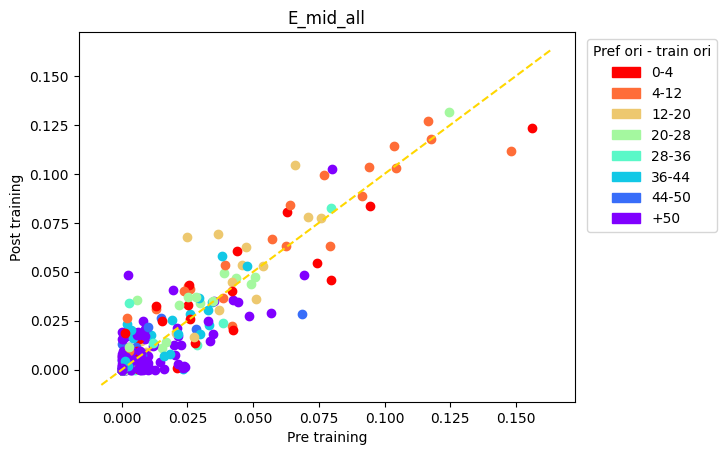

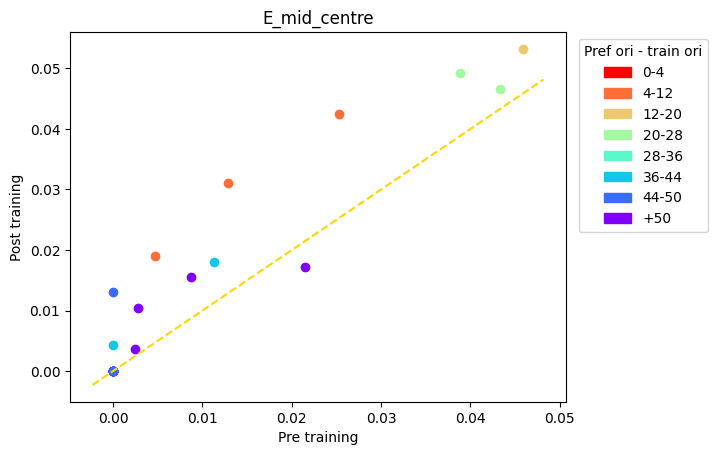

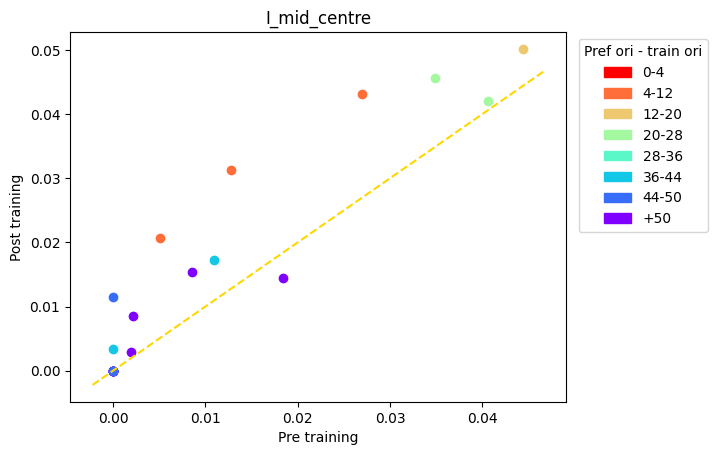

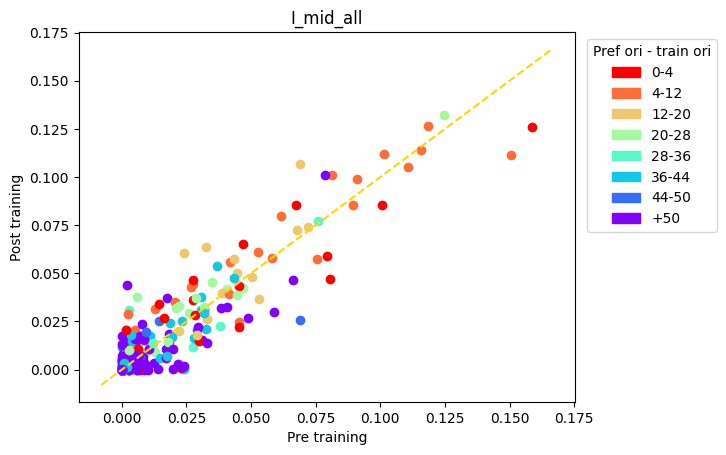

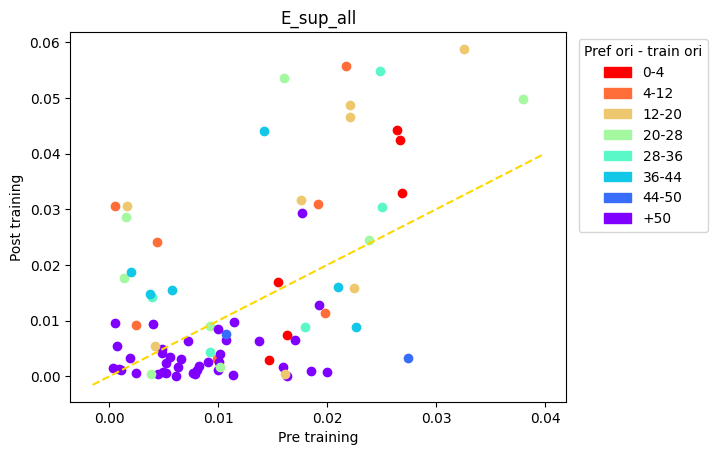

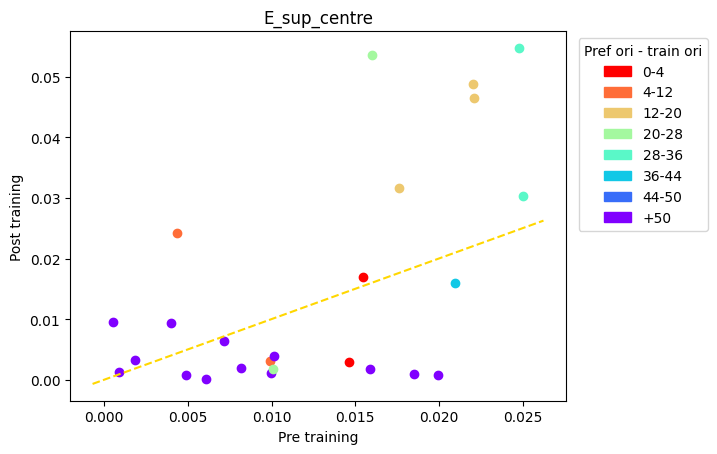

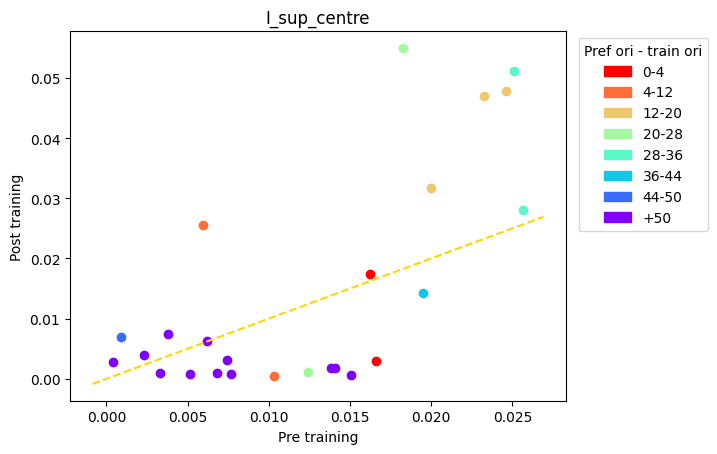

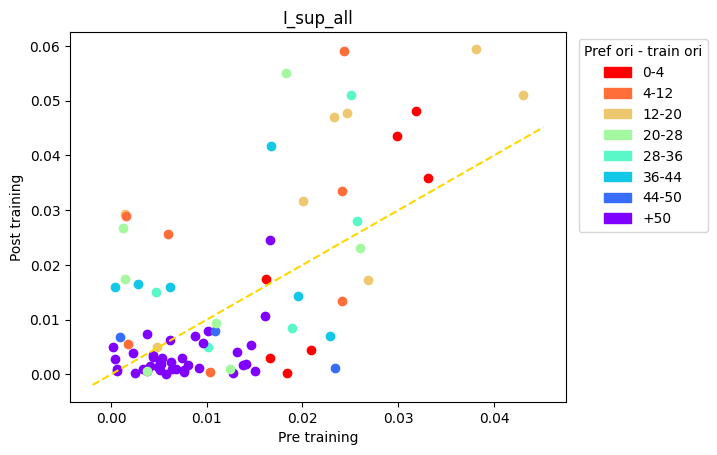

In [11]:
saving_dir = os.path.join(save_dir, 'norm')  ## CHANGE HERE
if os.path.exists(saving_dir) == False:
       os.makedirs(saving_dir)

####MIDDLE LAYER RESPONSE ##################
orientations = norm_oris_mid
x_axis = norm_slope_mid_pre #CHANGE HERE
y_axis = norm_slope_mid_post    #CHANGE HERE

indices_to_plot = E_indices_mid
title = 'E_mid_all'
plot_pre_post_scatter(x_axis = x_axis , y_axis = y_axis , orientations = orientations, indices_to_plot = indices_to_plot, title = title, save_dir = saving_dir)

indices_to_plot = centre_E_indices
title = 'E_mid_centre'
plot_pre_post_scatter(x_axis = x_axis , y_axis = y_axis , orientations = orientations, indices_to_plot = indices_to_plot, title = title, save_dir = saving_dir)

indices_to_plot = centre_I_indices
title = 'I_mid_centre'
plot_pre_post_scatter(x_axis = x_axis , y_axis = y_axis , orientations = orientations, indices_to_plot = indices_to_plot, title = title, save_dir = saving_dir)

indices_to_plot = I_indices_mid
title = 'I_mid_all'
plot_pre_post_scatter(x_axis = x_axis , y_axis = y_axis , orientations = orientations, indices_to_plot = indices_to_plot, title = title, save_dir = saving_dir)

###### SUPERFICIAL LAYER RESPONSE ############
orientations = norm_oris_sup
x_axis = norm_slope_sup_pre    #CHANGE HERE
y_axis = norm_slope_sup_post   #CHANGE HERE

indices_to_plot = E_indices_sup
title = 'E_sup_all'
plot_pre_post_scatter(x_axis = x_axis , y_axis = y_axis , orientations = orientations, indices_to_plot = indices_to_plot, title = title, save_dir = saving_dir)

indices_to_plot = centre_E_indices
title = 'E_sup_centre'
plot_pre_post_scatter(x_axis = x_axis , y_axis = y_axis , orientations = orientations, indices_to_plot = indices_to_plot, title = title, save_dir = saving_dir)

indices_to_plot = centre_I_indices
title = 'I_sup_centre'
plot_pre_post_scatter(x_axis = x_axis , y_axis = y_axis , orientations = orientations, indices_to_plot = indices_to_plot, title = title, save_dir = saving_dir)

indices_to_plot = I_indices_sup
title = 'I_sup_all'
plot_pre_post_scatter(x_axis = x_axis , y_axis = y_axis , orientations = orientations, indices_to_plot = indices_to_plot, title = title, save_dir = saving_dir)


In [31]:
all_centre = np.concatenate((centre_E_indices, centre_I_indices))

In [46]:
all_sup = np.concatenate((E_indices_sup, I_indices_sup))

Schoups plot

In [35]:
bins = ['0-4', '4-12', '12-20', '20-28', '28-36', '36-44', '44-50', '+50']
labels = []
#Select layer 
orientations = norm_oris_mid #CHANGE HERE
for idx in E_indices_mid:
        #Select bin and colour
    if np.abs(orientations[idx]) <4:
        labels.append(0)
    elif np.abs(orientations[idx]) >50:
        labels.append(7)
    else:
        labels.append(int(1+np.floor((np.abs(orientations[idx]) -4)/8) ))
#Create list of labels for given layer
labels = np.asarray(labels)

In [36]:
#Cluster slopes according to bin
mean_pre = []
mean_post = []
for i in range(0, len(bins)):
    print(i)
    mean_pre.append(norm_slope_mid_pre[np.argwhere(labels==i)].mean()) #CHANGE HERE
    mean_post.append(norm_slope_mid_post[np.argwhere(labels==i)].mean()) #CHANGE HERE

0
1
2
3
4
5
6
7


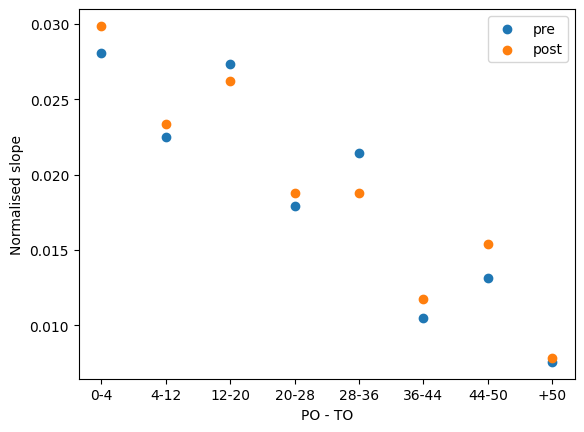

In [37]:
plt.scatter(np.linspace(0, 7, 8), mean_pre, label = 'pre')
plt.scatter(np.linspace(0, 7, 8), mean_post, label = 'post')
plt.xticks(ticks=np.linspace(0, 7, 8), labels=bins)
plt.legend()
plt.ylabel('Normalised slope')
plt.xlabel('PO - TO')
plt.savefig(os.path.join(save_dir, 'Schoups_plot_E_mid.png'))


In [ ]:
for neuron_index in centre_E_indices: 
    plt.plot(ori_list, mid_layer_pre[ neuron_index, :], label = 'pre')
    plt.plot(ori_list, mid_layer_post[neuron_index, :], label = 'post')
    plt.xlabel('Stimulus orientation')
    plt.ylabel('Neuron response')
    plt.title(neuron_index)

    plt.legend()
    #plt.savefig(os.path.join(results_dir, 'E_mid_layer_tuning_curve_'+str(neuron_index)+'.png'))
    plt.show()
    plt.close()

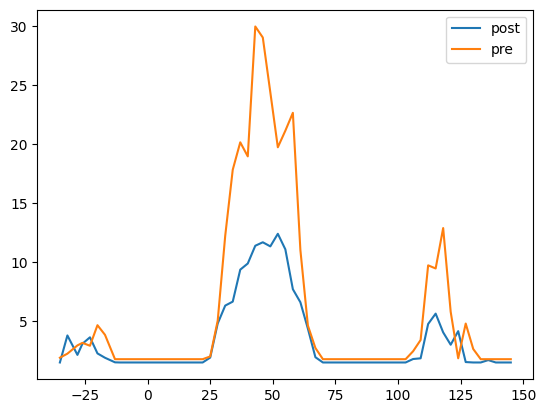

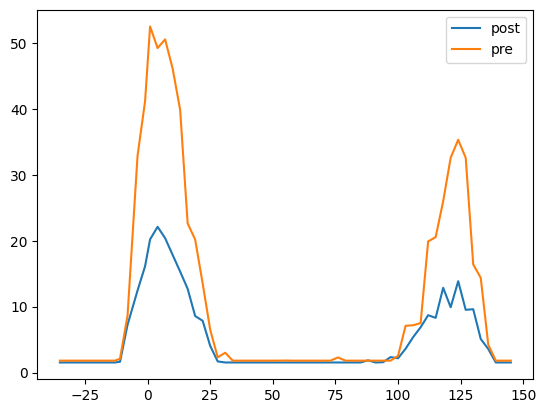

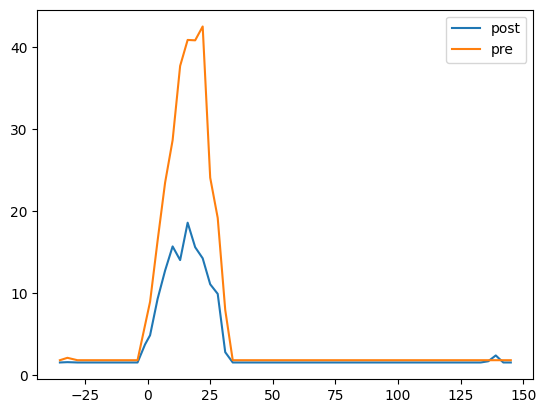

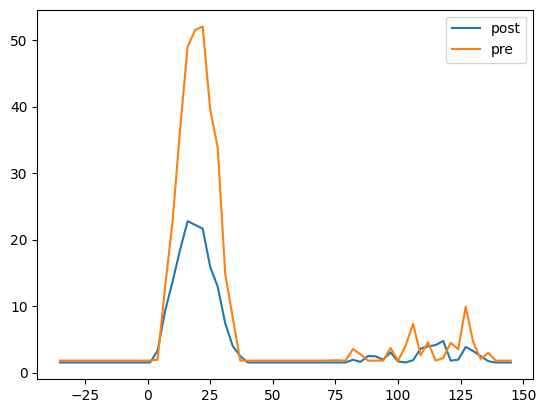

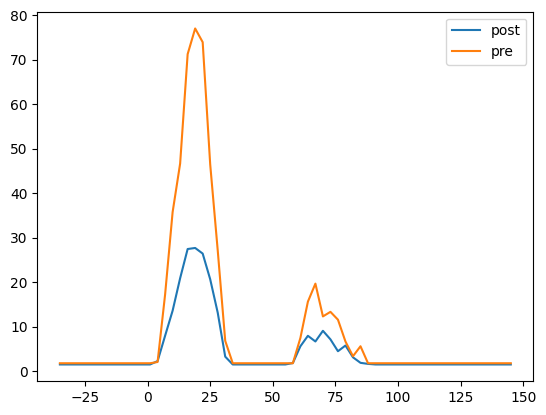

In [27]:
for neuron_index in centre_I_indices[:5]:
    plt.plot(ori_list, mid_layer_post[neuron_index, :], label = 'post')
    plt.plot(ori_list, mid_layer_pre[neuron_index, :], label = 'pre')
    plt.legend()
    #plt.savefig(os.path.join(results_dir, 'tuning_curve_mid_'+str(neuron_index)+'_I.png'))
    plt.show()

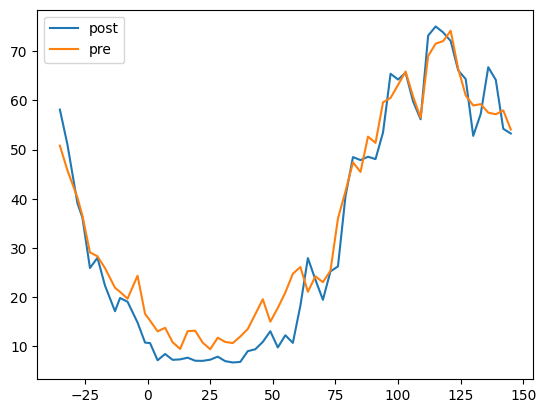

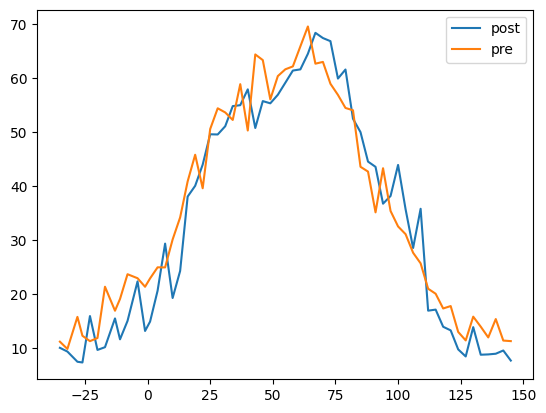

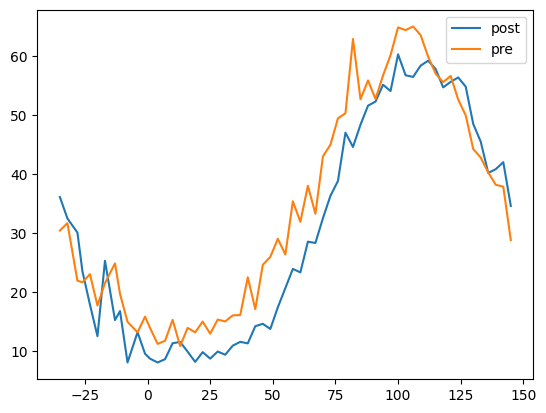

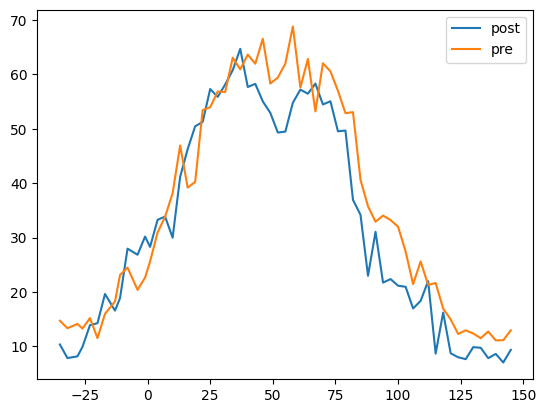

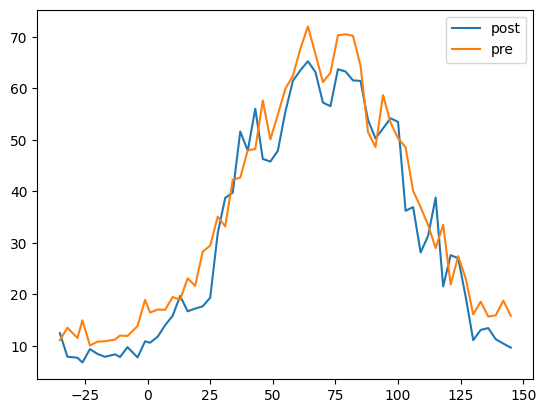

In [29]:
for neuron_index in centre_I_indices[10:15]:
    plt.plot(ori_list, sup_layer_post[neuron_index, :], label = 'post')
    plt.plot(ori_list, sup_layer_pre[neuron_index, :], label = 'pre')
    plt.legend()
    plt.savefig(os.path.join(results_dir, 'tuning_curve_sup_'+str(neuron_index)+'_I.png'))
    plt.show()

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)


pre_data = sup_layer_pre[-81:, :]
post_data =  sup_layer_post[-81:, :]
pca.fit(pre_data)
pca.explained_variance_ratio_

array([0.5330932, 0.4282104], dtype=float32)

In [31]:
sup_pre_data = pca.fit_transform(pre_data)
sup_post_data = pca.fit_transform(post_data)
sup_pre_data.shape

(81, 2)

In [20]:
results_dir

'/mnt/d/ABG_Projects_Backup/ssn_modelling/ssn-simulator/results/11-12/noise_end_stimuli_noise200.0gE0.3lamda1/response_matrices'

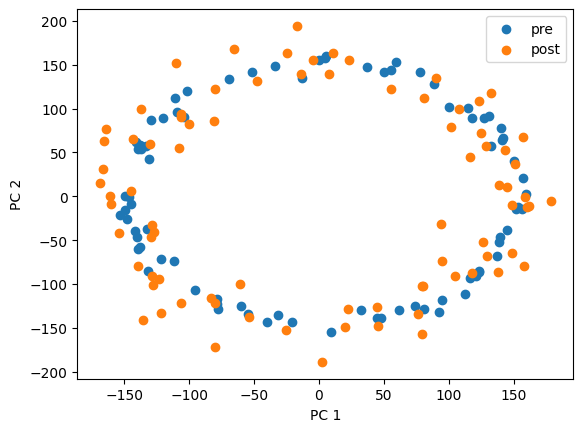

In [48]:
plt.scatter(sup_pre_data[:, 0], sup_pre_data[:, 1], label = 'pre')
plt.scatter(sup_post_data[:, 0], sup_post_data[:, 1], label = 'post')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.savefig(os.path.join(results_dir, 'superficial_I.png'))
plt.show()

In [34]:
pca_mid_pre = PCA(n_components=2)
mid_pre_data = mid_layer_pre[:81, :]
mid_post_data = mid_layer_post[:81, :]
pca_mid_pre.fit(mid_pre_data)


mid_pre_data = pca_mid_pre.fit_transform(mid_pre_data)
mid_post_data = pca_mid_pre.fit_transform(mid_post_data)

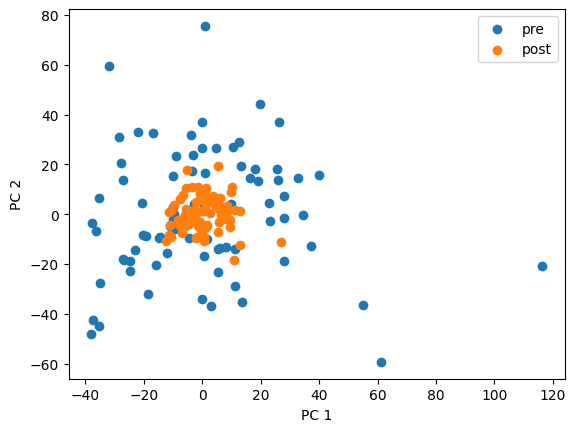

In [35]:
plt.scatter(sup_pre_data[:, 0], sup_pre_data[:, 1], label = 'pre')
plt.scatter(sup_post_data[:, 0], sup_post_data[:, 1], label = 'post')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.savefig(os.path.join(results_dir, 'middle_E.png'))
plt.show()

In [51]:
from sklearn.manifold import TSNE

In [59]:
mid_layer_post_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(mid_layer_post[:81, :])
mid_layer_pre_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(mid_layer_pre[:81, :])

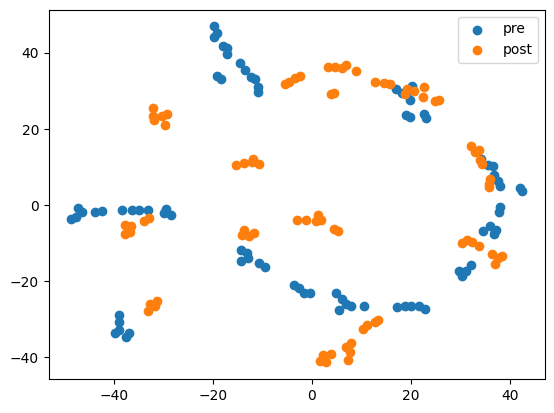

In [61]:
plt.scatter(sup_layer_pre_embedded[:,0], sup_layer_pre_embedded[:,1], label = 'pre')
plt.scatter(sup_layer_post_embedded[:,0], sup_layer_post_embedded[:,1], label = 'post')
plt.legend()
plt.savefig(os.path.join(results_dir, 'TSNE_I_superficial.png'))


In [ ]:
mid_layer_post_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(sup_layer_post[:81, :])
mid_layer_pre_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(sup_layer_pre[:81, :])

In [36]:
from sklearn.cluster import KMeans
#kmeans_pre = KMeans(n_clusters=2, random_state=0).fit(sup_pre_data)
kmeans = KMeans(n_clusters=2, random_state=0).fit(sup_layer_post[:81])

In [37]:
kmeans

KMeans(n_clusters=2, random_state=0)

In [40]:
kmeans.labels_.shape

(81,)

In [41]:
sup_pre_data[:, 0].shape

(81,)

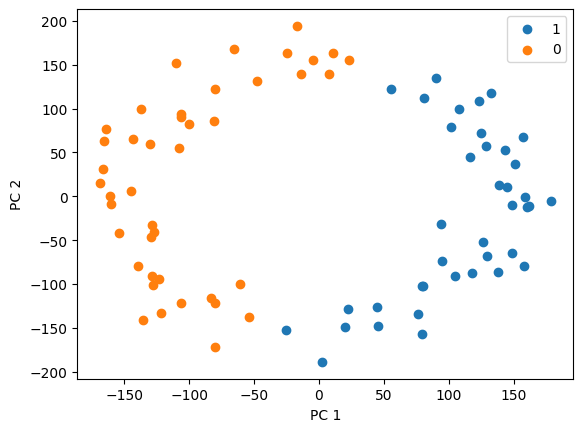

In [46]:
plt.scatter(sup_post_data[:, 0], sup_post_data[:, 1], label = '1')
plt.scatter(sup_post_data[:, 0][kmeans.labels_ == 0], sup_post_data[:, 1][kmeans.labels_ == 0], label = '0')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.savefig(os.path.join(results_dir, 'superficialE_clustered.png'))
plt.show()

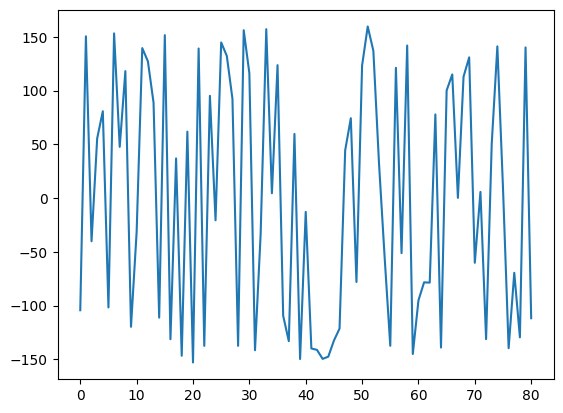

In [65]:
plt.plot(sup_pre_data[:, 0])

In [66]:
class_0_indices = [kmeans.labels_ == 0]

In [67]:
sup_layer_post

[array([False,  True, False,  True,  True, False,  True, False,  True,
        False, False,  True,  True,  True, False,  True, False,  True,
        False,  True, False,  True, False,  True, False,  True,  True,
         True, False,  True,  True, False,  True,  True,  True,  True,
        False, False,  True, False,  True, False, False, False, False,
        False, False,  True,  True, False,  True,  True,  True,  True,
        False, False,  True, False,  True, False, False, False, False,
         True, False,  True,  True,  True,  True,  True, False,  True,
        False,  True,  True, False, False, False, False,  True, False])]